- `T` seconds
- `rate`, `r` kHz
- `60` FPS
- `1920 x 1080` FullHD 16:9
- нужно учитывать что нужно достаточно семплов взять чтобы частота по найквисту хотя бы до `1kHz` была (а лучше `5kHz`)
- нужно чтобы кадры realtime с аудио ехали. Возможно это не такая уж и проблема

In [200]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]
# plt.rcParams['figure.figsize'] = [12, 12]

In [9]:
T = 2 # seconds
r = 44100 # sampling rate
N = r * T

t = np.linspace(0, T, N)
f = np.linspace(50, 250, N)
s = np.sin(2 * np.pi * f * t) # signal

In [12]:
f_n = 1080 # height of video, unlike fft its independent from chunk_size, choose it whatever you like

In [15]:
t.shape

(88200,)

In [3]:
n = 10
x = np.arange(n)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
nperseg  = 4
noverlap = 1
step    = nperseg - noverlap
shape   = ((x.shape[-1] - noverlap) // step, nperseg)
strides = (step * x.strides[-1], x.strides[-1])
result  = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)
print(shape)
# print(strides)
print(result)

(3, 4)
[[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


# `60` `1920 x 1080` frames per `1` second 
- audio: minimal overlap (max step) <br>
- video: `np.roll` `1px` per frame
    - if `1px` per frame, 60 frames, spectrogram width = 

In [150]:
rate = 44100
aL = 1 # seconds
aN = rate * aL
t = np.linspace(0, aL, aN)
f = np.linspace(50, 250, aN)
audio = np.sin(2 * np.pi * f * t)
fps = 60

In [226]:
nperseg = 10_458 # probably need adjust this to achieve 60 frames
# nperseg = 10_460 # probably need adjust this to achieve 60 frames
# step = 17.235 # should ABAP (As Big As Possible)
step = 17 # should ABAP (As Big As Possible)
noverlap = nperseg - step

# (44100 - nov) // step # should be 1979 
(44100 - nperseg + step) // step - 1919 # frames, should be 60

60

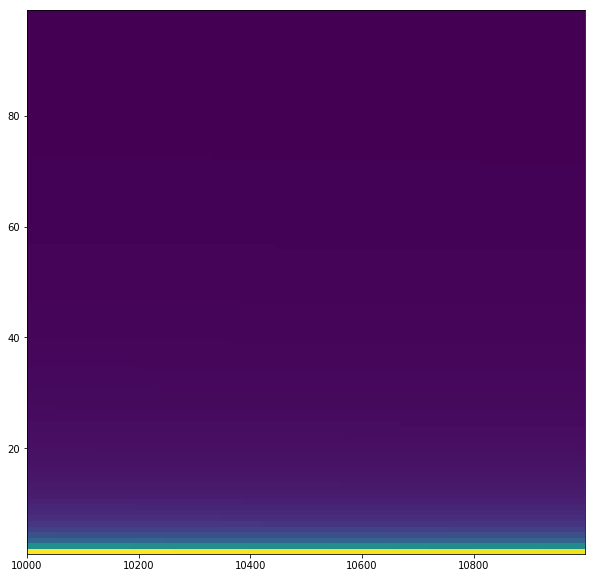

In [214]:
nps = np.arange(10_000, 11_000)
stp = np.arange(1, 100)

NPS, STP = np.meshgrid(nps, stp)
frames = (44100 - NPS + STP) // STP - 1919 # frames, should be 60
plt.pcolormesh(NPS, STP, frames)

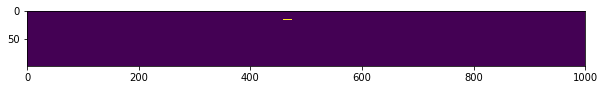

In [215]:
# np.count_nonzero(frames == 60)
plt.imshow(frames == 60)

In [182]:
x = audio
shape   = ((x.shape[0] - noverlap) // step, nperseg)
strides = (step * x.strides[-1], x.strides[-1])
audio_rolled = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)
audio_rolled.shape

(1980, 10450)

In [183]:
# fake compute_spectrogram(chunk)
specgram = np.random.random((audio_rolled.shape[0], 1080))
specgram.shape
print(specgram.shape)
print(specgram.shape[0] - 1919)

(1980, 1080)
61


In [174]:
# now we roll this with 1px to get 60 1920px-width frames 
nperseg = 1920 #  
step = 1 # 1px
noverlap = nperseg - step
shape = ((specgram.shape[0] - noverlap) // step, nperseg)
print(shape)
strides = (step * specgram.strides[-1], specgram.strides[-1])
specgram_rolled  = np.lib.stride_tricks.as_strided(specgram, shape=shape, strides=strides)
specgram_rolled.shape

(64, 1920)


(64, 1920)

In [ ]:
(40000 - 9000) // 1000

In [43]:
stp = 469
(28081 + stp) // stp

60

In [22]:
sp_w = 1979
nov  = 1920 - 1 # sps - step
(sp_w - nov) // 1 # should be 60

60

2203123

In [56]:
# [         sp_w = 1979          ]
nps = 10_000
step = 17.235 # should ABAP (As Big As Possible)
nov = nps - step
(44100 - nov) // step # should be 1979 

1979.0

# better off

In [177]:
rate = 44100
seconds = 1

n = rate * seconds

print(n)

nperseg  = 10460 # something between 4k..20k
step     = 17  # should be as big as possible
noverlap = nperseg - step
fps = 60

# print(N / rate * fps)
# specgram_n = (n - noverlap) // step
# print(specgram_n)

frame_width = 1920 # frame_width
frame_step = 1 # px
# noverlap_2 = frame_width - frame_step
# print(specgram_n - noverlap_2 // step_2, seconds * fps)

print(((rate * seconds - (nperseg - step)) // step) - (frame_width - frame_step), seconds * fps)

44100
60 60


In [174]:
rate = 44100
seconds = 2
n = rate * seconds
nperseg  = 10460 # something between 4k..20k
step     = 17  # should be as big as possible
noverlap = nperseg - step
fps = 60
frame_width = 1920 # frame_width
frame_step = 1 # px

print(((rate * seconds - (nperseg - step)) // step) - (frame_width - frame_step), seconds * fps)

2654 120


In [144]:
# rate = 44100*2
seconds = 1
n = rate * seconds
fps = 60

frame_width = 1920 # frame_width
frame_step = 1 # px

nps = np.arange(6000, 15000)
stp = np.arange(1, 100)

NPS, STP = np.meshgrid(nps, stp)

EQUALITY = np.zeros(NPS.shape, dtype=np.bool)

for rate in np.arange(44100, 200000, 100):
    if rate % 20000 == 0:
        print(rate)
    EQUALITY += ((rate * seconds - (NPS - STP)) // STP) - frame_width + frame_step == seconds * fps

60000
80000
100000
120000
140000
160000
180000


In [152]:
rate = 44100
seconds = 1
n = rate * seconds
fps = 60

frame_width = 1920 # frame_width
frame_step = 1 # px

nps = np.arange(6000, 15000)
stp = np.arange(1, 100)

NPS, STP = np.meshgrid(nps, stp)

EQUALITY = np.zeros(NPS.shape, dtype=np.bool)


EQUALITY += ((rate * seconds - (NPS - STP)) // STP) - frame_width + frame_step == seconds * fps

[14416 14417 14418 14419 14420 14421 14422 14423 14424 14425]
[15 15 15 15 15 15 15 15 15 15]


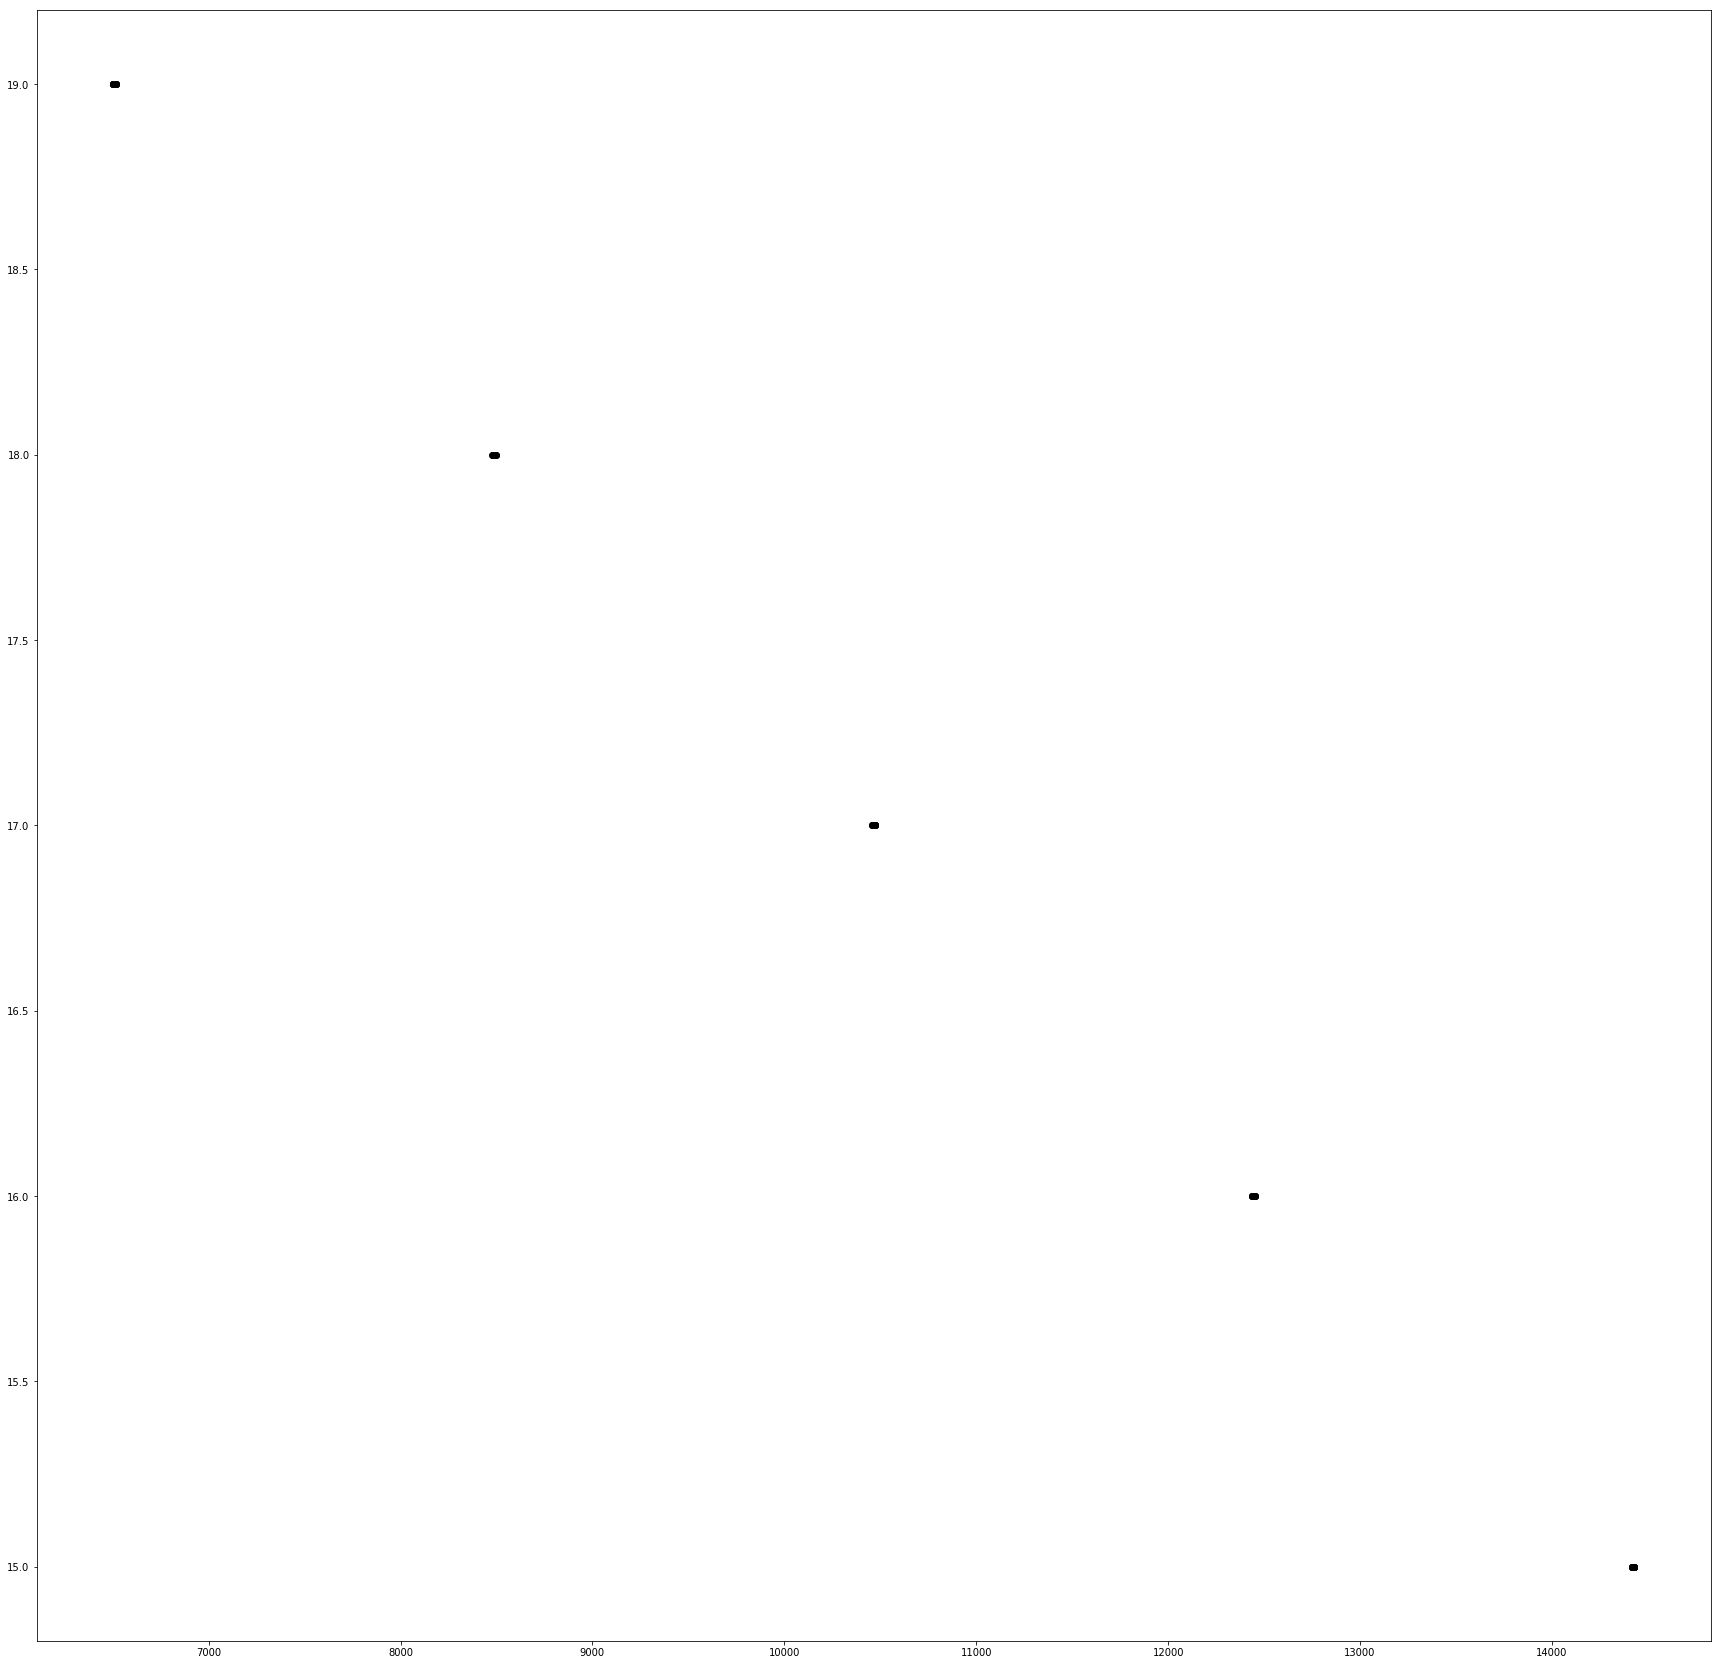

In [166]:
# plt.plot(NPS[EQUALITY], 'o')
# plt.plot(STP[EQUALITY], 'o')
plt.plot(NPS[EQUALITY], STP[EQUALITY], 'ko')
print(NPS[EQUALITY][:10])
print(STP[EQUALITY][:10])

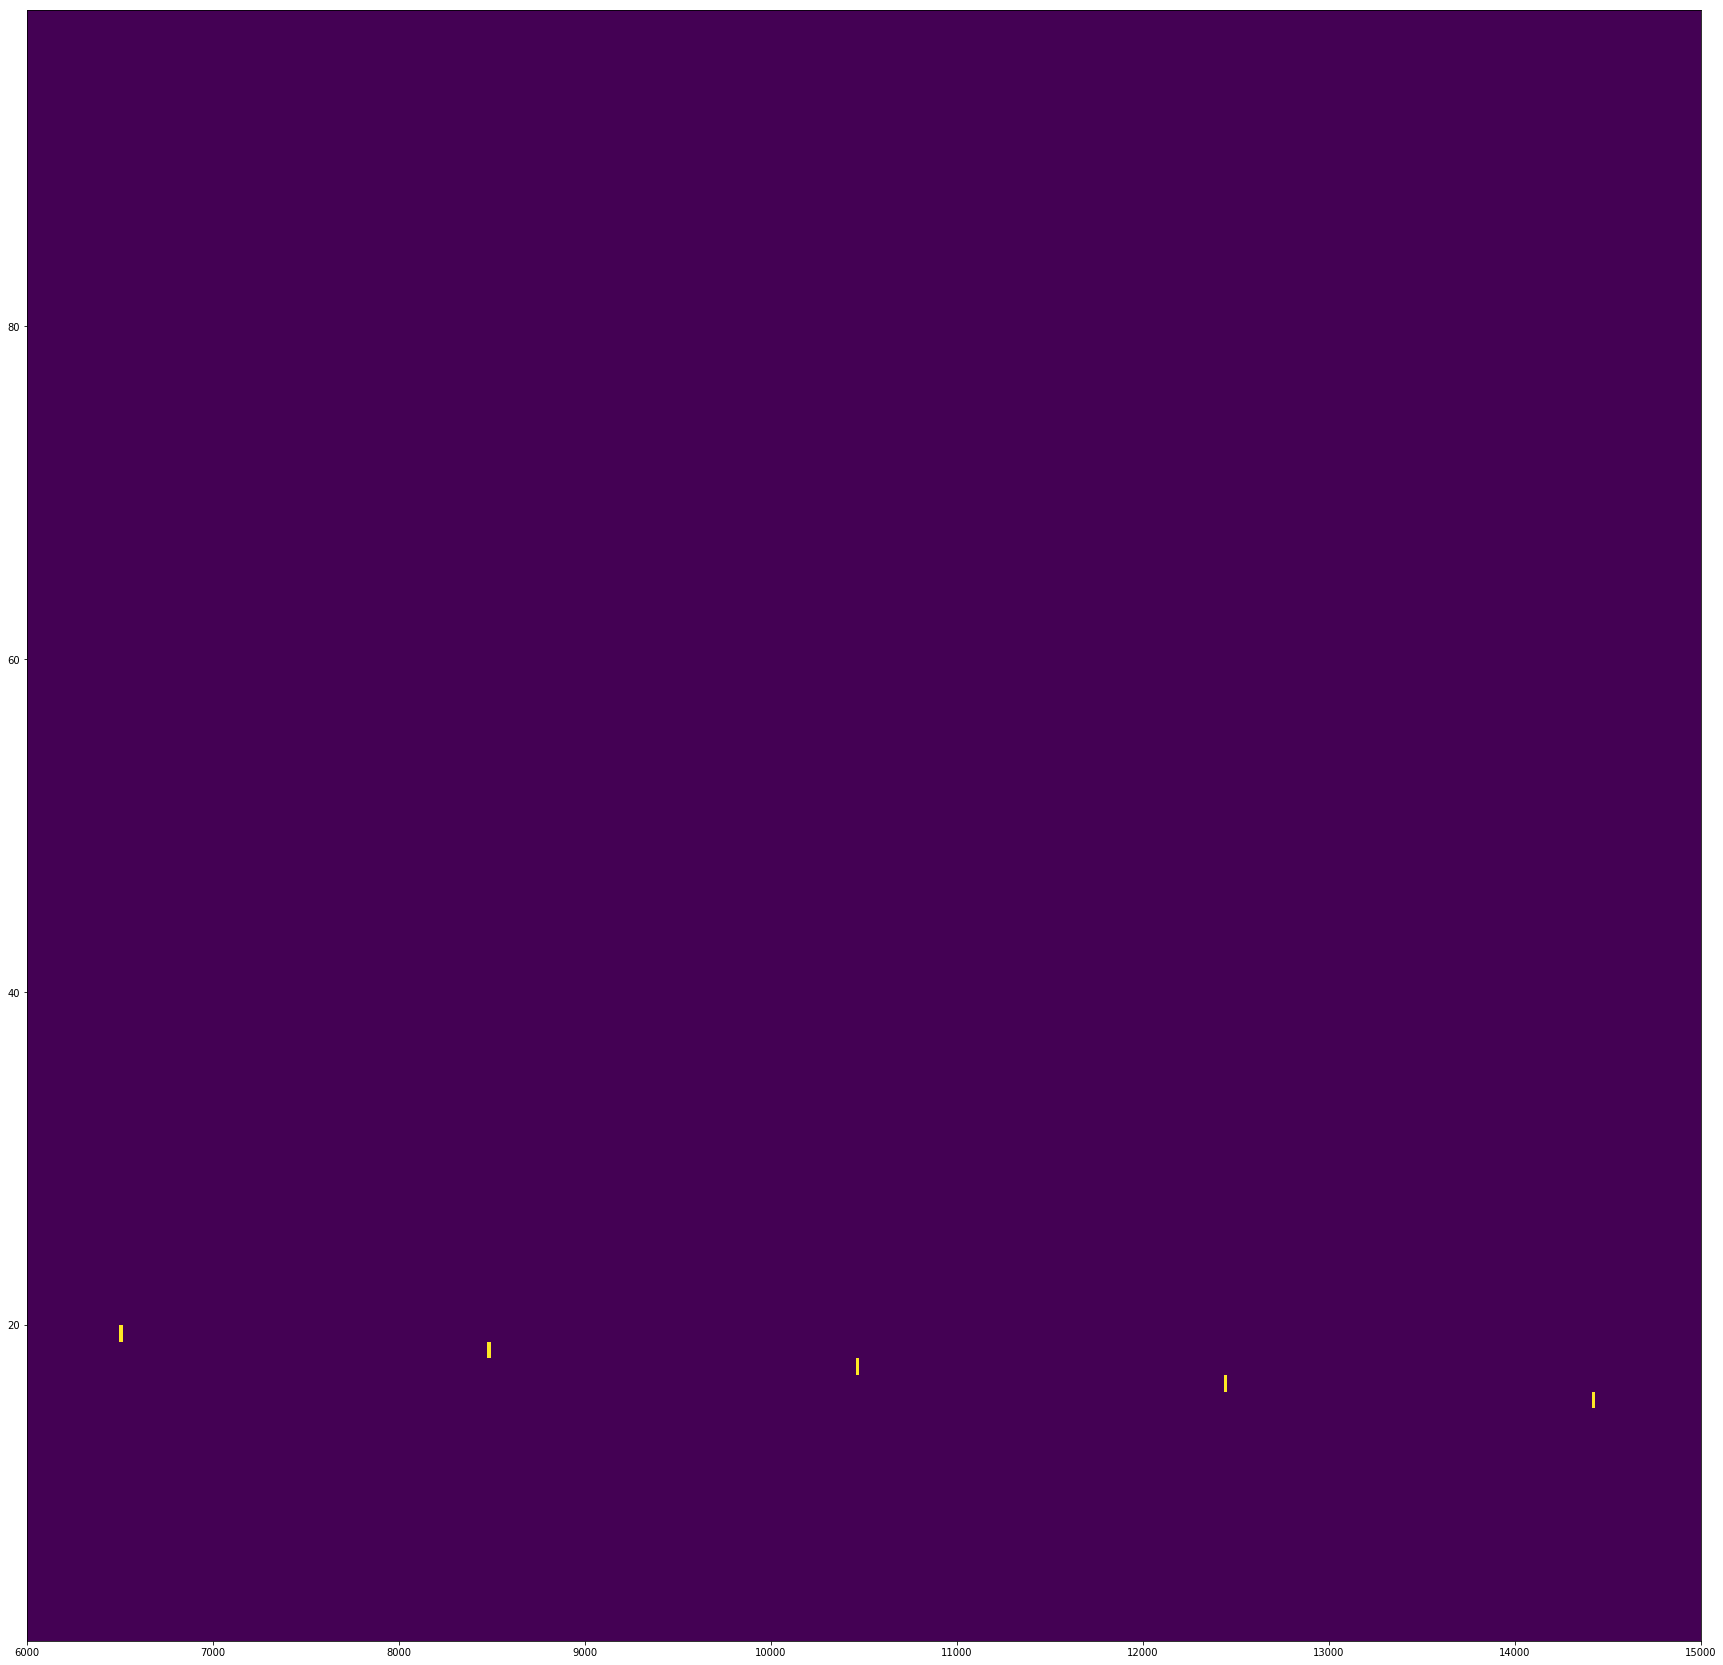

In [153]:
plt.pcolormesh(
    NPS, 
    STP, 
    EQUALITY
)

# helper

In [84]:
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

X, Y = np.meshgrid(x, y)

EQUALITY = np.zeros(X.shape, dtype=np.bool)

for r in np.arange(100):
    EQUALITY += np.abs((X + 3 + r) - (Y - r/4)) < 0.1

In [ ]:
plt.pcolormesh(
    X, 
    Y, 
    EQUALITY
)

# Super Solver | better off 2

In [196]:
rate = 44100
seconds = 8
n = rate * seconds
fps = 60

frame_width = 1920 # frame_width
frame_step = 1 # px

# YOU CAN VARY THIS RANGES:
nps = np.arange(6000, 15000)
stp = np.arange(1, 200)

NPS, STP = np.meshgrid(nps, stp)

EQUALITY = ((rate * seconds - (NPS - STP)) // STP) - frame_width + frame_step == seconds * fps

# Choose  As Big As Possible `step`

In [197]:
# plt.plot(NPS[EQUALITY], 'o')
# plt.plot(STP[EQUALITY], 'o')
# plt.plot(NPS[EQUALITY], STP[EQUALITY], 'ko')

# print(NPS[EQUALITY][:100])
# print(STP[EQUALITY][:100])

print(NPS[EQUALITY])
print(STP[EQUALITY])

[14542 14543 14544 14545 14546 14547 14548 14549 14550 14551 14552 14553
 14554 14555 14556 14557 14558 14559 14560 14561 14562 14563 14564 14565
 14566 14567 14568 14569 14570 14571 14572 14573 14574 14575 14576 14577
 14578 14579 14580 14581 14582 14583 14584 14585 14586 14587 14588 14589
 14590 14591 14592 14593 14594 14595 14596 14597 14598 14599 14600 14601
 14602 14603 14604 14605 14606 14607 14608 14609 14610 14611 14612 14613
 14614 14615 14616 14617 14618 14619 14620 14621 14622 14623 14624 14625
 14626 14627 14628 14629 14630 14631 14632 14633 14634 14635 14636 14637
 14638 14639 14640 14641 14642 14643 14644 14645 14646 14647 14648 14649
 14650 14651 14652 14653 14654 14655 14656 14657 14658 14659 14660 14661
 14662 14663 14664 14665 14666 14667 14668 14669 14670 14671 14672 14673
 14674 14675 14676 14677 14678 14679 14680 14681 14682 12143 12144 12145
 12146 12147 12148 12149 12150 12151 12152 12153 12154 12155 12156 12157
 12158 12159 12160 12161 12162 12163 12164 12165 12

In [199]:
# test found solutions here
nperseg  = 9886
step     = 143  

print(((rate * seconds - (nperseg - step)) // step) - (frame_width - frame_step), seconds * fps)

480 480


# Lite Solver

In [216]:
rate = 44100
seconds = 8
n = rate * seconds
fps = 60

# YOU CAN VARY THIS RANGES:
nps = np.arange(6000, 15000)
stp = np.arange(1, 1000)

NPS, STP = np.meshgrid(nps, stp)

EQUALITY = ((rate * seconds - (NPS - STP)) // STP) == seconds * fps

print(len(NPS[EQUALITY]), len(STP[EQUALITY]))

13345 13345


In [223]:
# plt.plot(NPS[EQUALITY], 'o')
# plt.plot(STP[EQUALITY], 'o')
# plt.plot(NPS[EQUALITY], STP[EQUALITY], 'ko')

start = 5600
end = start + 200
print(NPS[EQUALITY][start:end])
print(STP[EQUALITY][start:end])

print(NPS[EQUALITY])
print(STP[EQUALITY])

[11672 11673 11674 11675 11676 11677 11678 11679 11680 11681 11682 11683
 11684 11685 11686 11687 11688 11689 11690 11691 11692 11693 11694 11695
 11696 11697 11698 11699 11700 11701 11702 11703 11704 11705 11706 11707
 11708 11709 11710 11711 11712 11713 11714 11715 11716 11717 11718 11719
 11720 11721 11722 11723 11724 11725 11726 11727 11728 11729 11730 11731
 11732 11733 11734 11735 11736 11737 11738 11739 11740 11741 11742 11743
 11744 11745 11746 11747 11748 11749 11750 11751 11752 10561 10562 10563
 10564 10565 10566 10567 10568 10569 10570 10571 10572 10573 10574 10575
 10576 10577 10578 10579 10580 10581 10582 10583 10584 10585 10586 10587
 10588 10589 10590 10591 10592 10593 10594 10595 10596 10597 10598 10599
 10600 10601 10602 10603 10604 10605 10606 10607 10608 10609 10610 10611
 10612 10613 10614 10615 10616 10617 10618 10619 10620 10621 10622 10623
 10624 10625 10626 10627 10628 10629 10630 10631 10632 10633 10634 10635
 10636 10637 10638 10639 10640 10641 10642 10643 10

In [ ]:
# test found solutions here
nperseg  = 9886
step     = 143  

print(((rate * seconds - (nperseg - step)) // step) - (frame_width - frame_step), seconds * fps)